In [1]:
#import libraries
import pandas as pd
import numpy as np
import sklearn 
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

import time

In [2]:
# load the sales data set
df = pd.read_excel("Online_Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [6]:
# Converting the 'datetime' column to datetime type
df['datetime'] = pd.to_datetime(df['InvoiceDate'])

# Splitting into date and time columns
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

# Print the updated dataframe
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

             datetime        date      time  
0 2010-12-01 08:26:00  2010-12-01  08:26:00  
1 2010-12-01 08:26:00  2010-12-01  08:26:00  
2 2010-12-01 08:26:00  2010-12-01  08:26:00 

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,date,time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,08:26:00


In [8]:
6*2.55

15.299999999999999

In [9]:
df["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [10]:
# missng. values in the data
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
datetime            0
date                0
time                0
dtype: int64

In [11]:
# drop missing values in the data
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
datetime       0
date           0
time           0
dtype: int64

In [13]:
df["Date"] = df["InvoiceDate"].dt.date
df["Hour"] = df["InvoiceDate"].dt.hour
df["Minute"] = df["InvoiceDate"].dt.minute

In [14]:
# # Convert datetime column to datetime type
# df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# # Split datetime column into date, hour, and minute
# df['date'] = df['datetime'].dt.date
# df['hour'] = df['datetime'].dt.hour
# df['minute'] = df['datetime'].dt.minute
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
datetime       0
date           0
time           0
Date           0
Hour           0
Minute         0
dtype: int64

In [15]:
# generate total sales attribute 
df["Sales"] = df["Quantity"]*df["UnitPrice"]

In [16]:
df["Sales"]

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Sales, Length: 406829, dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   datetime     406829 non-null  datetime64[ns]
 9   date         406829 non-null  object        
 10  time         406829 non-null  object        
 11  Date         406829 non-null  object        
 12  Hour         406829 non-null  int64         
 13  Minute       406829 non-null  int64         
 14  Sales        406829 non-null  float64       
dtypes: datetime64[ns](2), float64(3), 

In [18]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
datetime       0
date           0
time           0
Date           0
Hour           0
Minute         0
Sales          0
dtype: int64

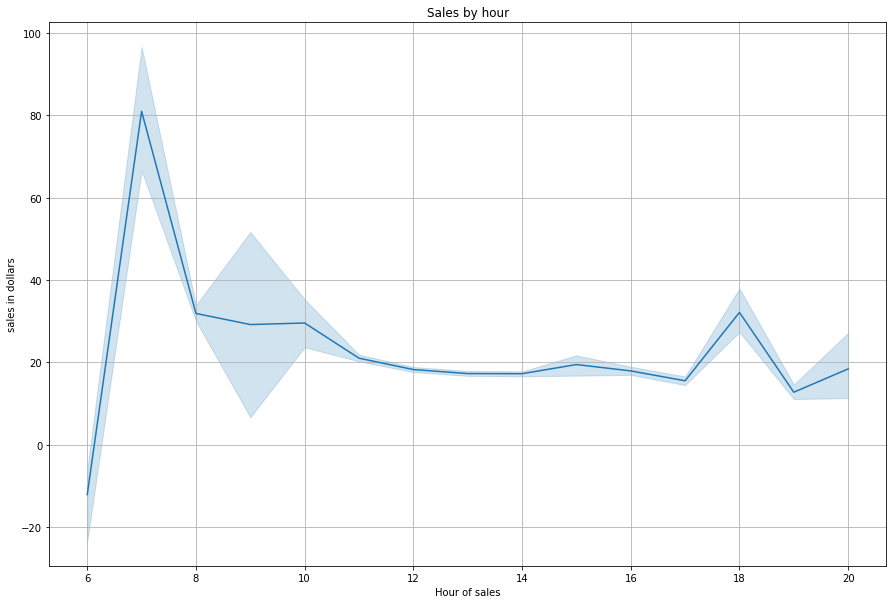

In [19]:
# sales trends by hour
plt.figure(figsize=(15,10))
sns.lineplot(data = df, x = "Hour",y = "Sales")
plt.grid()
plt.title("Sales by hour")
plt.xlabel("Hour of sales")
plt.ylabel("sales in dollars")
plt.show()

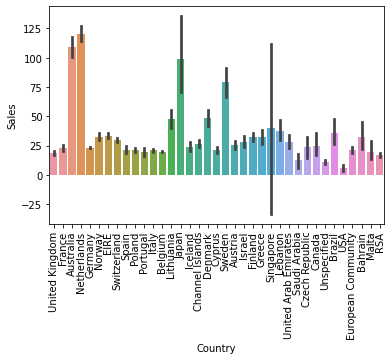

In [20]:
ax = sns.barplot(data = df,x = "Country",y = "Sales")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [21]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'datetime', 'date', 'time',
       'Date', 'Hour', 'Minute', 'Sales'],
      dtype='object')

In [22]:
#sales made by country
df.groupby("Country")["Sales"].sum()

Country
Australia                137077.270
Austria                   10154.320
Bahrain                     548.400
Belgium                   40910.960
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20086.290
Cyprus                    12946.290
Czech Republic              707.720
Denmark                   18768.140
EIRE                     250285.220
European Community         1291.750
Finland                   22326.740
France                   196712.840
Germany                  221698.210
Greece                     4710.520
Iceland                    4310.000
Israel                     6994.250
Italy                     16890.510
Japan                     35340.620
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2505.470
Netherlands              284661.540
Norway                    35163.460
Poland                     7213.140
Portugal                  29059.810
RSA                 

In [23]:
# split the data to fit a model

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error


In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,date,time,Date,Hour,Minute,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,08:26:00,2010-12-01,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,08:26:00,2010-12-01,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,08:26:00,2010-12-01,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,08:26:00,2010-12-01,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,08:26:00,2010-12-01,8,26,20.34


In [25]:
# fit a timeseries model to project sales over time
import statsmodels.api as sm

In [26]:
# Set 'datetime' column as the index
df.set_index('datetime', inplace=True)

# Resample the data to daily frequency
data_daily = df['Sales'].resample('D').sum()



In [27]:
# Fit the ARIMA model
# Adjust the order as per your requirements
model = sm.tsa.ARIMA(data_daily, order=(1, 0, 0)) 
model_fit = model.fit()

In [31]:
#split the data into train and test data
X = df[['Quantity','UnitPrice', 'Country',
       'Date', 'Hour', 'Minute',]]
y = df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 406829 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   date         406829 non-null  object        
 9   time         406829 non-null  object        
 10  Date         406829 non-null  object        
 11  Hour         406829 non-null  int64         
 12  Minute       406829 non-null  int64         
 13  Sales        406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object

In [28]:
#print the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  374
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -4139.477
Date:                Mon, 08 May 2023   AIC                           8284.954
Time:                        16:53:41   BIC                           8296.727
Sample:                    12-01-2010   HQIC                          8289.629
                         - 12-09-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.219e+04   1416.639     15.666      0.000    1.94e+04     2.5e+04
ar.L1          0.4022      0.047      8.490      0.000       0.309       0.495
sigma2      2.398e+08      0.040   5.92e+09      0.0

In [33]:
import joblib

In [34]:
# export the model as pickle file
joblib.dump(model_fit,'arima_model.pkl')

['arima_model.pkl']

In [36]:
joblib.load("arima_model.pkl")